In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

In [2]:
df = pd.read_csv('AASG_Thermed_AllTempsThicksConds.csv',low_memory=False)
df_apino = pd.read_excel('geo__.xlsx')
df.APINo = df_apino.APINo

In [3]:
df2 = pd.read_csv('Past+New_Wells/lat_lon_new_wells.csv')

In [4]:
well_id_last_digits = []
for i in df2.well_id.astype('str'):
    well_id_last_digits.append(i[6:])

In [5]:
len(np.unique(well_id_last_digits))

92

In [6]:
for i in df2.well_id:
    print(i)

4710701631
4710302973
4710300645
4710100065
4709501963
4709501474
4709501264
4709300105
4709300104
4709100479
4709100138
4708509707
4708509701
4708509450
4708509402
4708300178
4708300103
4707901506
4707901504
4707700458
4707700185
4707700099
4707500050
4706100370
4705900879
4705900811
4705900805
4705700106
4705700001
4705300297
4705300071
4704701120
4704700115
4704500496
4704303192
4704301637
4704102039
4703905616
4703905307
4703905250
4703904701
4703903462
4703902481
4703502978
4703502750
4703502643
4703502638
4703502637
4703502623
4703502622
4703502621
4703502619
4703502592
4703502591
4703502584
4703502583
4703502565
4703502564
4703502552
4703502551
4703502550
4703502457
4703502455
4703502452
4703502451
4703502442
4703502441
4703502440
4703502428
4703502416
4703501369
4703501366
4702500022
4702105590
4702105522
4701900241
4701705638
4701705462
4701502644
4701304647
4701100534
4700702589
4700502168
4700502167
4700502166
4700502165
4700502157
4700502148
4700502146
4700501984
4700102985

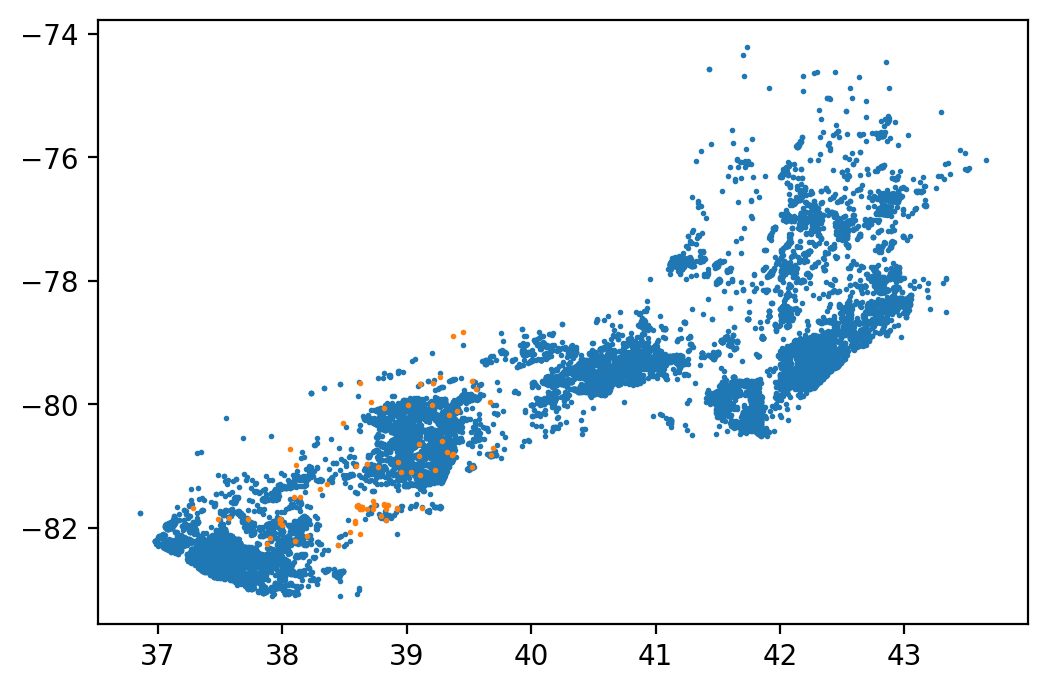

In [103]:
fig, ax = plt.subplots()
ax.scatter(df.LatDegree, df.LongDegree, s=1)
ax.scatter(df2.lat, df2.lon, s=1)
#for i, txt in enumerate(well_id_last_digits):
#    ax.annotate(txt, (df2.lat[i], df2.lon[i]),size=5)
plt.show()

In [56]:
plt.rcParams["font.family"] = "Times New Roman"

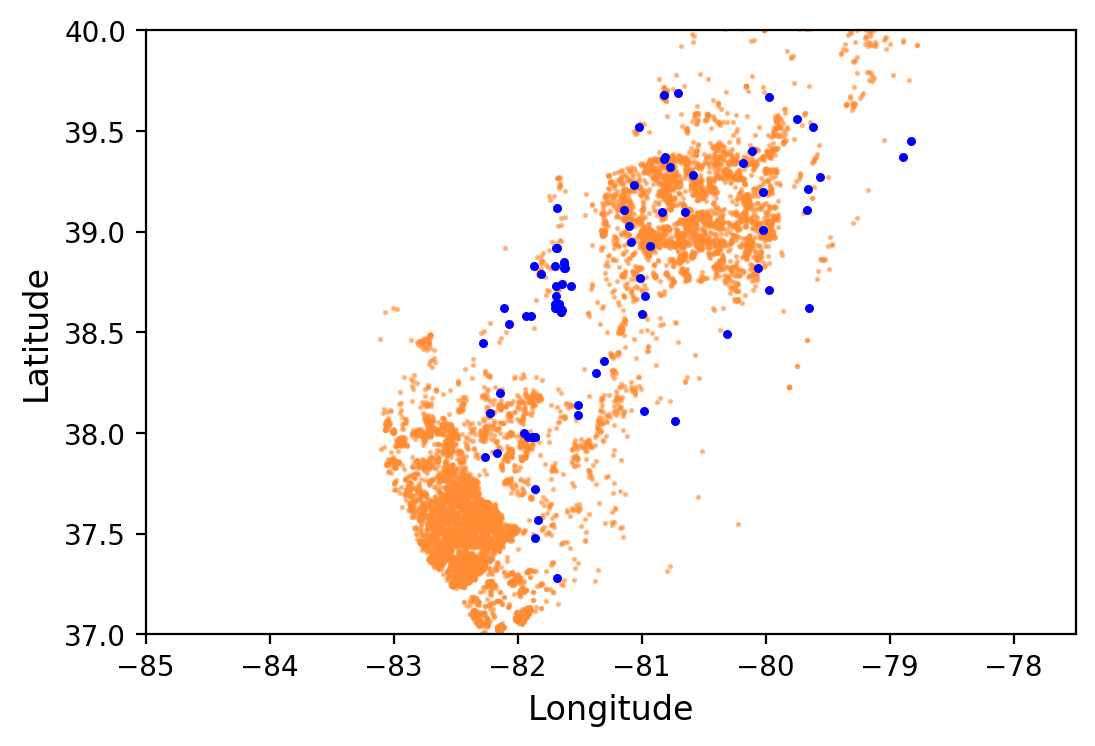

In [59]:
fig, ax = plt.subplots()
ax.scatter(df.LongDegree, df.LatDegree, s=1, alpha=0.5, c=np.array([[1.0, 0.55, 0.20]]))
ax.scatter(df2.lon, df2.lat, s=5,c='blue')
plt.xlim(-85,-77.5)
plt.ylim(37,40)
#for i, txt in enumerate(well_id_last_digits):
#    ax.annotate(txt, (df2.lat[i], df2.lon[i]),size=5)

plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.show()

# Obtain Prediction Data from the Physical Model

In [122]:
df_for_api = df.loc[0:20750-476] # from - 476 it is clean

In [123]:
temp = df_for_api.APINo.astype('int')/10/10/10/10
df_for_api.APINo = temp.astype('int')

In [126]:
df_for_api.APINo

0        1601900002
1        1601900003
2        1601900006
3        1601900009
4        1601900018
            ...    
20270    4710903036
20271    4710903039
20272    4710903047
20273    4710903049
20274    4710903065
Name: APINo, Length: 20275, dtype: int64

In [164]:
valid_id = [4700100668, 4700102985, 4700501984, 4700502146, 4700502148,
       4700502157, 4700502165, 4700502166, 4700502167, 4700502168,
       4700702589, 4701100534, 4701304647, 4701502644, 4701705462,
       4701705638, 4701900241, 4702105522, 4702105590, 4702500022,
       4703501366, 4703501369, 4703502978, 4703904701, 4703905307,
       4704102039, 4704301637, 4704303192, 4704500496, 4704700115,
       4704701120, 4705300071, 4705300297, 4705700106, 4705900805,
       4705900811, 4705900879, 4706100370, 4707500050, 4707700099,
       4707700185, 4707700458, 4707901504, 4707901506, 4708300103,
       4708509402, 4708509450, 4708509701, 4708509707, 4709100138,
       4709100479, 4709300104, 4709300105, 4709501264, 4709501474,
       4709501963, 4710100065, 4710300645]
valid_id = np.array(valid_id)

In [131]:
temp_check = df_for_api.APINo.values

In [132]:
temp_check

array([1601900002, 1601900003, 1601900006, ..., 4710903047, 4710903049,
       4710903065])

In [153]:
matching_pairs = []
for i in list(range(0,len(df))):
    curr_old_lon = abs(df.LongDegree[i]); curr_old_lat = abs(df.LatDegree[i]);
    for j in list(range(0,len(df2))):
        curr_new_lon = abs(df2.lon[j]); curr_new_lat = abs(df2.lat[j]);
        # Within few hundred meters
        if abs(curr_new_lon - curr_old_lon) < 0.01 and abs(curr_new_lat-curr_old_lat)<0.01:
            print(curr_old_lon, curr_old_lat, curr_new_lon, curr_new_lat)
            matching_pairs.append([i,j])

80.013553 39.002323 80.02 39.01
80.01987700000001 39.018275 80.02 39.01
80.020647 39.20418 80.02 39.2
81.951887 37.995024 81.95 38.0
81.856082 37.977475 81.86 37.98
81.856082 37.977475 81.86 37.98
81.87814300000001 37.97675 81.87 37.98
81.87814300000001 37.97675 81.87 37.98
81.87814300000001 37.97675 81.88 37.98
81.87814300000001 37.97675 81.88 37.98
81.88199200000001 37.97965 81.88 37.98
81.88199200000001 37.97965 81.88 37.98
81.878693 37.983131 81.87 37.98
81.878693 37.983131 81.87 37.98
81.878693 37.983131 81.88 37.98
81.878693 37.983131 81.88 37.98
81.918345 37.976024 81.92 37.98
81.866897 37.984871999999996 81.86 37.98
81.866897 37.984871999999996 81.86 37.98
81.866897 37.984871999999996 81.87 37.98
81.866897 37.984871999999996 81.87 37.98
81.866529 37.980666 81.86 37.98
81.866529 37.980666 81.86 37.98
81.866529 37.980666 81.87 37.98
81.866529 37.980666 81.87 37.98
81.863961 37.976605 81.86 37.98
81.863961 37.976605 81.86 37.98
81.863961 37.976605 81.87 37.98
81.863961 37.976605 8

In [156]:
val = np.unique(np.array(matching_pairs)[:,1])

In [163]:
temp = df2.loc[val].well_id.values

In [167]:
cnt = 0
for i in temp:
    if np.isin(i, valid_id):
        print(i)
        cnt = cnt + 1
print(cnt)

4710300645
4709501963
4709501264
4709300105
4709300104
4709100479
4709100138
4708509707
4708509701
4708509450
4708509402
4707700185
4707500050
4704500496
4704303192
4703502978
4703501369
4702105590
4702105522
4701705638
4701705462
4701502644
4701304647
4701100534
4700702589
4700502168
4700502167
4700502166
4700502165
4700502157
4700502148
4700502146
4700501984
4700102985
4700100668
35
